In [1]:
import calendar
from earthkit import data, climate, maps

In [2]:
url = "https://get.ecmwf.int/repository/test-data/earthkit/t2m-western-europe-1980_2022.grib"
fs = data.from_source("url", url)
fs.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,surface,0,19800101,0,0,an,0,regular_ll
1,ecmf,2t,surface,0,19800201,0,0,an,0,regular_ll
2,ecmf,2t,surface,0,19800301,0,0,an,0,regular_ll
3,ecmf,2t,surface,0,19800401,0,0,an,0,regular_ll
4,ecmf,2t,surface,0,19800501,0,0,an,0,regular_ll
...,...,...,...,...,...,...,...,...,...,...
511,ecmf,2t,surface,0,20220801,0,0,an,0,regular_ll
512,ecmf,2t,surface,0,20220901,0,0,an,0,regular_ll
513,ecmf,2t,surface,0,20221001,0,0,an,0,regular_ll
514,ecmf,2t,surface,0,20221101,0,0,an,0,regular_ll


In [3]:
# Calculate the climatology with the raw earthkit data object
climatology = climate.climatology.mean(fs, frequency="month")

In [4]:
fs_clim = data.from_object(climatology)

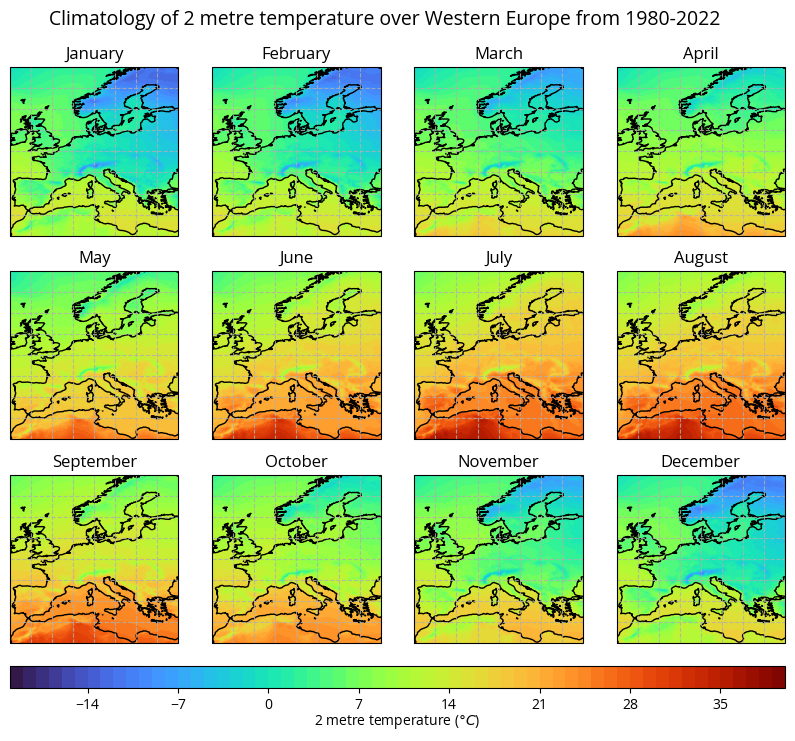

In [5]:
chart = maps.Chart()
chart.shaded_contour(fs_clim, cmap="turbo", levels=range(-20, 41), units="celsius")
chart.legend(location="bottom")
for subplot, month_name in zip(chart.subplots, calendar.month_name[1:]):
    subplot.title(month_name)
chart.coastlines()
chart.gridlines(draw_labels=False)
chart.title("Climatology of {variable_name} over Western Europe from 1980-2022", fontsize=14)
chart.show()